In [6]:
#load the keras library - building neural network easy!
import keras 
#load the MNIST(Modified National Institute of Standards and Technology) - 70,000 grayscale handwritten digits(0-9) images
from keras.datasets import mnist
#build neural network with layers added one after the other in a straight line - Sequential
from keras.models import Sequential
#import the layers
#dense layer - fully connected layer (each neuron connects to all neurons in the next layer)
#dropout layer - prevent overfitting by randomly turning off some neurons during training
#input layer - define the input shape of the 1st layer
from keras.layers import Dense, Dropout, Input
#import the optimizer to adjust weights; RMSprop - LR optimization algorithm
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [7]:
#load the data and split as training and testing
#x_train - To teach the model - Images for training (60,000 images)
#y_train - model knows the correct answers - Labels for training images (digits 0–9)
#x_test - To check how well the model learned - Images for testing (10,000 images)
#y_test - Compare predictions with true values - Labels for test images
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#checking the shape(dim) of 1st image
x_train[0].shape

(28, 28)

In [4]:
#get the pixel value of some random image(0 -> Black and 255 -> White)
x_train[500]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
#get the label of some random image => digit stored in that
y_train[500]

3

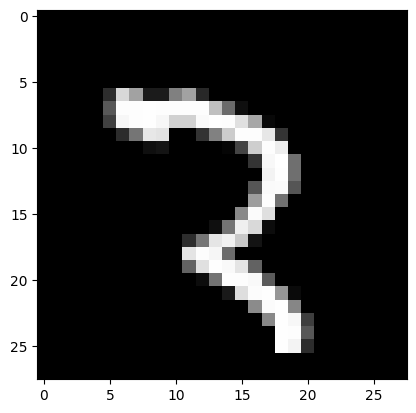

In [8]:
#to display some random image 
plt.imshow(x_train[500], cmap='Greys_r')
plt.show()

In [9]:
#to print the dimentions of training and testing samples 
print(x_train.shape, 'train samples') #60,000 training images 
print(x_test.shape, 'test samples') #10,000 testing images

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [8]:
#to make image data suitable for neural network (converting 2D array(matrix) into 1D vector)
#28*28 image -> flat 784 pixel vector
#shape changes from (60,000, 28, 28) to (60,000, 784)
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

In [9]:
#change the pixel values to float numbers
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [10]:
#normalizing the pixel values ranging from 0 to 255 by /255 between 0 and 1
x_train /= 255
x_test /= 255

In [11]:
#Convert labels to one-hot vectors - model predict probabilities for each digit
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [12]:
#to build neural network model layer by layer
model = Sequential()
#1st layer
model.add(Dense(64, activation='relu', input_shape=(784,))) #Dense layer with 64 neurons,'relu' activation function, each image with 784 inputs 
model.add(Dropout(0.2)) #drop 20% of the neurons randomly during training to avoid overfitting
#repeat the same for 2nd hidden layer
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2)) 
#output layer
model.add(Dense(10, activation='softmax'))

#view model summary
model.summary()

C:\Users\thris\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#to compile the model
model.compile(
    loss='categorical_crossentropy', #Used for multi-class problems like digit classification
    optimizer=RMSprop(learning_rate=0.001), #Helps adjust weights to reduce error
    metrics=['accuracy'] #Tracks accuracy while training
)

In [14]:
#to trian the model
history = model.fit(
    x_train, y_train,
    batch_size = 128, #Trains the model on 128 images at a time (mini-batch)
    epochs = 30, #Model will go through all data 30 times
    verbose = 1, #Shows live training output
    validation_data = (x_test, y_test) #Uses test data to check model performance after each epoch
)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7460 - loss: 0.8253 - val_accuracy: 0.9357 - val_loss: 0.2099
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9199 - loss: 0.2717 - val_accuracy: 0.9506 - val_loss: 0.1572
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9369 - loss: 0.2090 - val_accuracy: 0.9597 - val_loss: 0.1295
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9473 - loss: 0.1781 - val_accuracy: 0.9615 - val_loss: 0.1266
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9527 - loss: 0.1605 - val_accuracy: 0.9686 - val_loss: 0.1092
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9571 - loss: 0.1447 - val_accuracy: 0.9692 - val_loss: 0.0997
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9602 - loss: 0.1318 - val_accuracy: 0.9702 - val_loss: 0.1008
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9628 - loss: 0.1276 - val_accuracy: 0.

In [16]:
#evaluate the model performance - tests the trained model with some unseen data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0]) #loss -> how 'wrong' the model is - should be low
print('Test accuracy:', score[1]) #accuracy -> how 'right' the model is - should be high

Test loss: 0.10545125603675842
Test accuracy: 0.9751999974250793


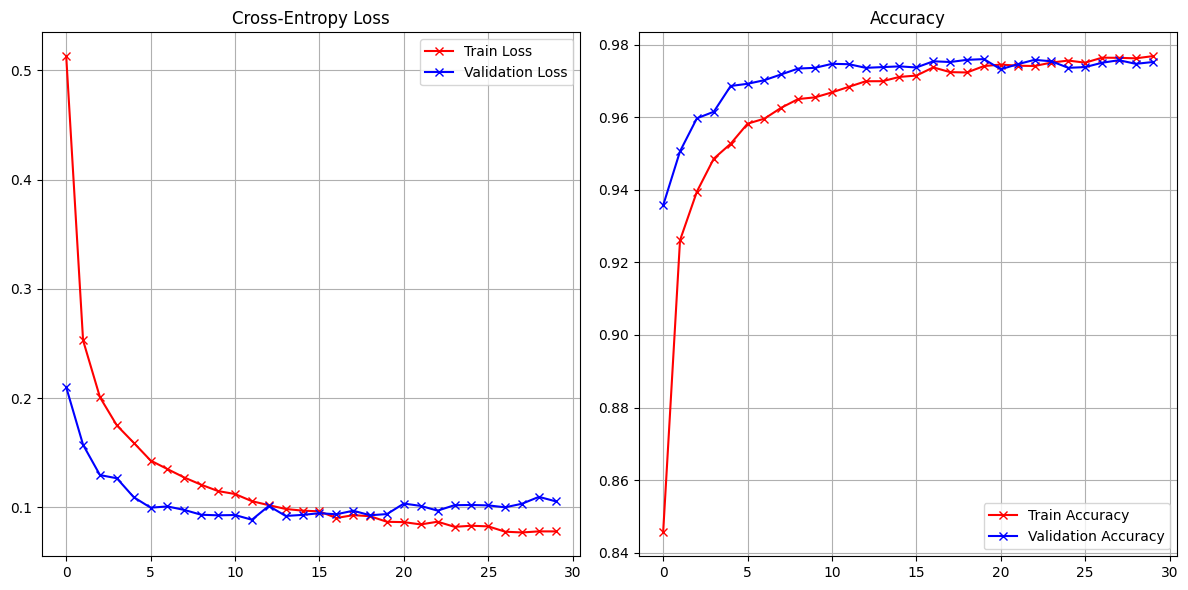

In [23]:
def plot_loss_accuracy(history): #define a function to plot training vs validation
    fig = plt.figure(figsize=(12, 6)) 
    
    # Plot Loss
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss") #model's performance on a known data
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss") #model's performance on a test data
    ax.legend() #If validation loss goes up while training loss goes down, it means your model is overfitting (memorizing instead of generalizing).
    ax.set_title('Cross-Entropy Loss')
    ax.grid(True)

    # Plot Accuracy
    ax = fig.add_subplot(1, 2, 2)
    
    # Try both old and new accuracy keys
    if "accuracy" in history.history:
        train_acc = "accuracy"
        val_acc = "val_accuracy"
    else:
        train_acc = "acc"
        val_acc = "val_acc"
        
    #both training and validation accuracy need to be high and close together 
    #to see if the model is improving and learning well over time
    ax.plot(history.history[train_acc],'r-x', label="Train Accuracy")
    ax.plot(history.history[val_acc],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('Accuracy')
    ax.grid(True)

    plt.tight_layout()
    plt.show()
    plt.close()  #Clears the plot from memory

# Call once
plot_loss_accuracy(history)